# Inserindo dados no MongoDB

In [1]:
from pymongo import MongoClient #Conexão com MongoDB
import pprint #Mostrar informações dos dados do banco de dados
import pandas as pd #Leitura dos arquivos
from pymongo import timeout
import numpy as np

## Criando o cliente do MongoDB

In [2]:
client = MongoClient('localhost', 27017)

In [3]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
#Nome do banco de dados
nome_bd = 'Sales-Forecasting_' 

In [5]:
db = client[nome_bd]

## Lendo os arquivos .csv

In [6]:
#Pega o nome dos arquivos e remove o .csv deles
import os

mylist = os.listdir("datasets")
dic_files = {}
for file in mylist:
    if not file.startswith("test"):
        aux = file.split(".")[0]
        dic_files[aux] = pd.read_csv(f"datasets/{file}")

/tmp/ipykernel_5013/3272867525.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dic_files[aux] = pd.read_csv(f"datasets/{file}")


In [7]:
# Total de datasets
len(dic_files)

2

## Removendo arquivos vazios

In [8]:
# Verificando se todos os datasets tem mais de 0 instâncias

final_dic = dic_files.copy()
for i in dic_files:

    if dic_files[i].shape[0] == 0:
        del final_dic[i]

In [9]:
# Total de datasets
len(final_dic)

2

## Visualizando informações dos conjuntos

In [10]:
# Cabeçalho de um conjunto de dados
final_dic['train'].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
# Formato do conjunto de dados
final_dic['train'].shape

(1017209, 9)

In [12]:
# Colunas dos nossos conjuntos de dados
final_dic['train'].columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [13]:
# Tipos dos nosso valores
final_dic['train'].dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [14]:
# Verificando valores NULOS
final_dic['train'].isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
# Cabeçalho de um conjunto de dados
final_dic['store'].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
# Formato do conjunto de dados
final_dic['store'].shape

(1115, 10)

In [17]:
# Colunas dos nossos conjuntos de dados
final_dic['store'].columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
# Tipos dos nosso valores
final_dic['store'].dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [19]:
# Verificando valores NULOS
final_dic['store'].isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Tratando valores NULOS

In [20]:
# Vamos verificar quais os atributos contém valores nulos nos datasets
for i in list(final_dic.keys()):
    print(list((final_dic[i].isna().sum() > 0).where((final_dic[i].isna().sum()>0)).dropna().keys()))

[]
['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


Os seguintes atributos tem pelo menos um valor NULO no conjunto de dados de store:  ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']. 

E devido a isso, iremos apenas remover estes atributos, já que não usaremos eles futuramente.

In [21]:
final_dic['store']['CompetitionDistance'].max()

75860.0

In [22]:
final_dic['store'].loc[final_dic['store']['CompetitionDistance'].isna(),'CompetitionDistance'] = int(1e5)

In [23]:
final_dic['store'].dropna(axis=1,inplace=True)

In [24]:
# Vamos verificar quais os atributos contém valores nulos nos datasets
for i in list(final_dic.keys()):
    print(list((final_dic[i].isna().sum() > 0).where((final_dic[i].isna().sum()>0)).dropna().keys()))

[]
[]


Tratamos os valores NULOS, agora podemos lidar com outros processamentos. Mas antes vamos inserir as lojas no nosso conjunto de dados.

## Inserindo as lojas no Mongo

In [25]:
final_dic['store'].head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


In [396]:
stores = db.Stores
stores

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Sales-Forecasting_'), 'Stores')

Estrutura da nossa coleção de Lojas:


Stores ={ { store_type: a, stores: [ {id_store:1, competitionDistance: 100, Promo2: 0, assortment: a}, {id_store:1, competitionDistance: 100, Promo2: 0, assortment: a}, {},... ]},

	{  store_type: b, stores: [ {}, {}, {},... ]},
	
	
	{  store_type: c, stores: [{}, {}, {},...  ]},
	
	
	{ store_type:  d, stores: [ {}, {}, {},... ]},
	
}

In [27]:
main_fdata = []

for i in final_dic['store']['StoreType'].unique():
    d = {'store_type':i, 'stores': []}
    main_fdata.append(d)
main_fdata

[{'store_type': 'c', 'stores': []},
 {'store_type': 'a', 'stores': []},
 {'store_type': 'd', 'stores': []},
 {'store_type': 'b', 'stores': []}]

In [28]:
d = {'c':0,'a':1,'d':2,'b':3}

In [29]:
columns = final_dic['store'].columns

rows,cols = final_dic['store'].shape


for index, row in final_dic['store'].iterrows():
        fdata = {}
        store_type = 'a'
        for i in range(cols):
                if not columns[i] == 'StoreType':
                    fdata[columns[i]] = row[columns[i]]
                else:
                    store_type = row[columns[i]]
        main_fdata[d[store_type]]['stores'].append(fdata)

with timeout(100):
    stores.insert_many(main_fdata)


In [30]:
for post in stores.find({'store_type':'a'}):
    pprint.pprint(post)

{'_id': ObjectId('6549202a6897c4c370774304'),
 'store_type': 'a',
 'stores': [{'Assortment': 'a',
             'CompetitionDistance': 570.0,
             'Promo2': 1,
             'Store': 2},
            {'Assortment': 'a',
             'CompetitionDistance': 14130.0,
             'Promo2': 1,
             'Store': 3},
            {'Assortment': 'a',
             'CompetitionDistance': 29910.0,
             'Promo2': 0,
             'Store': 5},
            {'Assortment': 'a',
             'CompetitionDistance': 310.0,
             'Promo2': 0,
             'Store': 6},
            {'Assortment': 'c',
             'CompetitionDistance': 24000.0,
             'Promo2': 0,
             'Store': 7},
            {'Assortment': 'a',
             'CompetitionDistance': 7520.0,
             'Promo2': 0,
             'Store': 8},
            {'Assortment': 'c',
             'CompetitionDistance': 2030.0,
             'Promo2': 0,
             'Store': 9},
            {'Assortment': 'a',
     

Aqui podemos prover as seguintes informações: Número total de lojas do mesmo tipo.

In [421]:
def countStores(store_id):

    

    try:
        collection = db.get_collection(f"Stores")

        q = {"stores": {"$elemMatch": {"Store":store_id}}}
        cursor = collection.find(q)
        stores_id = cursor[0]['stores']
        store_type = cursor[0]['store_type']
        print(f"Loja do tipo {store_type}")
        total_stores = len(stores_id)
    except:
        total_stores = 0 
        
    return total_stores

In [422]:
countStores(85)

Loja do tipo b


17

# Ideias para o conjunto de treino

Stores_Report_1 = {
	
	{ storeID: 1  , years: 2013, month: 01, logs: [{day:1, sales:500, open:0, customers:500, StateHoliday:0, SchoolHoliday: 0} , {day:2, sales:500, open:0, customers:500, StateHoliday:0, SchoolHoliday: 0}, {day:3, sales:500, open:0, customers:500, StateHoliday:0, SchoolHoliday: 0}] }

    { storeID: 1  , years: 2013, month: 02, logs: [{day:1, sales:500, open:0, customers:500, StateHoliday:0, SchoolHoliday: 0} , {day:2, sales:500, open:0, customers:500, StateHoliday:0, SchoolHoliday: 0}, {day:3, sales:500, open:0, customers:500, StateHoliday:0, SchoolHoliday: 0}] }

}


In [33]:
final_dic['train'].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [34]:
final_dic['train'].dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Variáveis Binárias: Irão continuar da mesma foram.

Variáveis categóricas: Store. Ideia interessante é colocar a média do mês naquele ano, para a loja, e a média dos dias das semana no mesmo ano.

Variáveis Data: Tratamento ainda não identificado.


Assim, precisamos construir algumas coleções auxiliares: 

Média da loja no ano anterior

Mas de qualquer jeito, devemos adicionar o conjunto de dados de treino ao nosso banco de dados

In [35]:
# Adiciona a coluna ANO-MES
df = final_dic['train'].copy()
df.loc[:,"Year"] = df['Date'].str.slice(0,4)
df.loc[:,"Month"] = df['Date'].str.slice(5,7)
df.loc[:,"Day"] = df['Date'].str.slice(8,10)


df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,07,31


In [36]:
store_collections = []

for store_id in df['Store'].unique():
    
    stores = db.get_collection(f"Store-{store_id}")
    store_collections.append(stores)


In [37]:
main_fdata = []
dic_aux = {}
import copy

years = np.sort(df['Year'].unique())
months = np.sort(df['Month'].unique())
dic_indexes = 0
for year in years:
    for month in months:
        if year == '2015' and int(month) > 7:
            break
        d = {'store_id':-1,'year':year,'month':month,'logs': [] , 'mean_month':-1}
        dic_aux[f'{year}-{month}']= dic_indexes
        dic_indexes += 1
        main_fdata.append(d)



In [38]:
main_fdata[0]

{'store_id': -1, 'year': '2013', 'month': '01', 'logs': [], 'mean_month': -1}

In [39]:
columns = df.columns

rows,cols = df.shape

N = len(store_collections)
import time
index_a = 0
t0 = time.time()

for store_id in df['Store'].unique():

    # O que será inserido.
    main_fdata2 = copy.deepcopy(main_fdata)
    df_aux = df[df['Store'] == store_id] # Linhas que são da loja com ID store_id

    for i in main_fdata2:
        i['store_id'] = int(store_id)

    year = '2013'
    month = '01'
    for index, row in df_aux.iterrows():
            fdata = {}
            
            for i in range(cols):
                    if columns[i] in ['Sales','Customers', 'Open','Promo','StateHoliday','SchoolHoliday','Day']:
                        try:
                            fdata[columns[i]] = row[columns[i]]
                        except:
                            fdata[columns[i]] = row[columns[i]]
                    elif columns[i] == 'Year':
                        year = row[columns[i]]
                    elif columns[i] == 'Month':
                        month = row[columns[i]]
            main_fdata2[dic_aux[f"{year}-{month}"]]['logs'].append(fdata)
    with timeout(100):
        store_collections[store_id-1].insert_many(main_fdata2)
    print(f"\r{index_a}/{N} ({(time.time()-t0):.3f} s)" , end=' ')
    index_a += 1
    


1114/1115 (117.922 s) 

In [40]:
store_id = 115
for post in store_collections[store_id-1].find({'year':'2013','month':'01'}):
    pprint.pprint(post)

{'_id': ObjectId('654920376897c4c3707750d5'),
 'logs': [{'Customers': 403,
           'Day': '31',
           'Open': 1,
           'Promo': 0,
           'Sales': 4882,
           'SchoolHoliday': 0,
           'StateHoliday': '0'},
          {'Customers': 403,
           'Day': '30',
           'Open': 1,
           'Promo': 0,
           'Sales': 4812,
           'SchoolHoliday': 0,
           'StateHoliday': '0'},
          {'Customers': 379,
           'Day': '29',
           'Open': 1,
           'Promo': 0,
           'Sales': 4716,
           'SchoolHoliday': 0,
           'StateHoliday': '0'},
          {'Customers': 469,
           'Day': '28',
           'Open': 1,
           'Promo': 0,
           'Sales': 5398,
           'SchoolHoliday': 0,
           'StateHoliday': '0'},
          {'Customers': 0,
           'Day': '27',
           'Open': 0,
           'Promo': 0,
           'Sales': 0,
           'SchoolHoliday': 0,
           'StateHoliday': '0'},
          {'Custome

# Inserindo a média dos meses/anos

In [41]:
def update_document(q_param,value,collection):

    collection.update_one(q_param,{"$set":value})

In [42]:
N = len(store_collections)
import time
index_a = 0
t0 = time.time()

for collection in store_collections:
    for document in collection.aggregate([
        { "$unwind": "$logs" },
        { "$group" : { "_id": "$_id", "avgMonth" : {  "$avg" : "$logs.Sales" } } }
    ]):
        q_param = {'_id':document['_id']}
        value = {'mean_month':document['avgMonth'] }
        update_document(q_param,value,collection)
    print(f"\r{index_a}/{N} ({(time.time()-t0):.3f} s)" , end=' ')
    index_a += 1
        

1114/1115 (24.044 s) 

In [43]:
# Query com pymongo
def get_document(q_param,col):
    return col.find(q_param)[0]

## Criando o dataset final

Iremos criar o mecanismo que faz a requisição dos dados para o MongoDB e já arruma eles em formato de dataFrame

In [46]:
def collections_request(collection) :

    input_list = []
    cursor = collection.find({})

    store_id = cursor[0]['store_id']


    for document in cursor:
        mean = document['mean_month']
        year = document['year']
        month = document['month']
        for daily in document['logs']:
            input_dic = {'ID_store':store_id,'MeanSales':mean,'Open':daily['Open'],'StateHoliday':daily['StateHoliday'],'SchoolHoliday':daily['SchoolHoliday'],
                    'Date':f"{year}-{month}-{daily['Day']}",'Sales':daily['Sales'] }
            input_list.append(input_dic)
        
    df = pd.DataFrame.from_records(input_list).sort_values(by='Date').reset_index().drop("index",axis=1)
    return df


In [47]:
store_id = 1
collections_request(db.get_collection(f"Store-{store_id}"))

,ID_store,MeanSales,Open,StateHoliday,SchoolHoliday,Date,Sales
0,1,4142.935484,0,a,1,2013-01-01,0
1,1,4142.935484,1,0,1,2013-01-02,5530
2,1,4142.935484,1,0,1,2013-01-03,4327
3,1,4142.935484,1,0,1,2013-01-04,4486
4,1,4142.935484,1,0,1,2013-01-05,4997
...,...,...,...,...,...,...,...
937,1,3911.806452,1,0,1,2015-07-27,6102
938,1,3911.806452,1,0,1,2015-07-28,5011
939,1,3911.806452,1,0,1,2015-07-29,4782
940,1,3911.806452,1,0,1,2015-07-30,5020


## Criando as funcionalidades

Número máximo de Clientes e Vendas (enfatizando a data): Retorna um gráfico por ano. (variando os meses) - Feito


Número total de Clientes e Vendas: Retorna um gráfico por ano (variando os meses). - Feito

Médias por ano e mes: Retorna um gráfico para tudo. - Feito

Comparação da média mensal com todas as outras lojas do mesmo tipo. - Feito

In [320]:
def store_exists(collection):
    try:
        _ = collection.find({})[0]
        return True
    except:
        print("Loja não existe")
        return False
        

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [373]:
def plot_grafico(x, y,title,day=False,days=None):


    plt.rcParams["figure.figsize"] = (20,8)
    
    # Pega as informações do cliente
    height = x
    bars = y

    for i in range(len(bars)):

        bars[i] = bars[i][2:]
        
    y_pos = np.arange(len(bars))

    

    plt.plot(y_pos,height,color = 'r',marker='o',markeredgecolor='black',markerfacecolor='black')

    if days:
        # zip joins x and y coordinates in pairs
        idx = 0
        for x,y in zip(y_pos,height):
        
            label = f"D:{days[idx]}"
            idx += 1
            plt.annotate(label, # this is the text
                         (x,y), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

        # Cria os nomes para o eixo X, o título, o label para o eixo Y e a legenda dos gráficos
    plt.xticks(y_pos, bars)
    plt.title(f"{title}")
    plt.ylabel("Frequency")

    plt.grid()

 
    
    plt.show()
    



In [324]:
def maxCustomers(store_id):


    
    collection = db.get_collection(f"Store-{store_id}")
    
    if not store_exists(collection):
        return None
    
    cursor = collection.aggregate([
    { "$unwind" :'$logs'},
    { "$sort": { "logs.Customers": -1 } },
    { "$group": {
        "_id": "$_id",
        "Year": {"$first": "$year"},
        "Month": {"$first": "$month"},
        "Day": { "$first": "$logs.Day" },
        "MaxCustomers": { "$max":"$logs.Customers"}
    }}
])
    
    order = {}
    order2 = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order[f"{i}-{j}"] = -1
            order2[f"{i}-{j}"] = -1
        
    for i in cursor:
        order[f"{i['Year']}-{i['Month']}"] = i['MaxCustomers']
        order2[f"{i['Year']}-{i['Month']}"] = int(i['Day'])
    
    x = list(order.values())
    y = list(order.keys())
    days = list(order2.values())

    title = f"Max Customers for Store-{store_id}"
    plot_grafico(x,y,title,True,days)
    

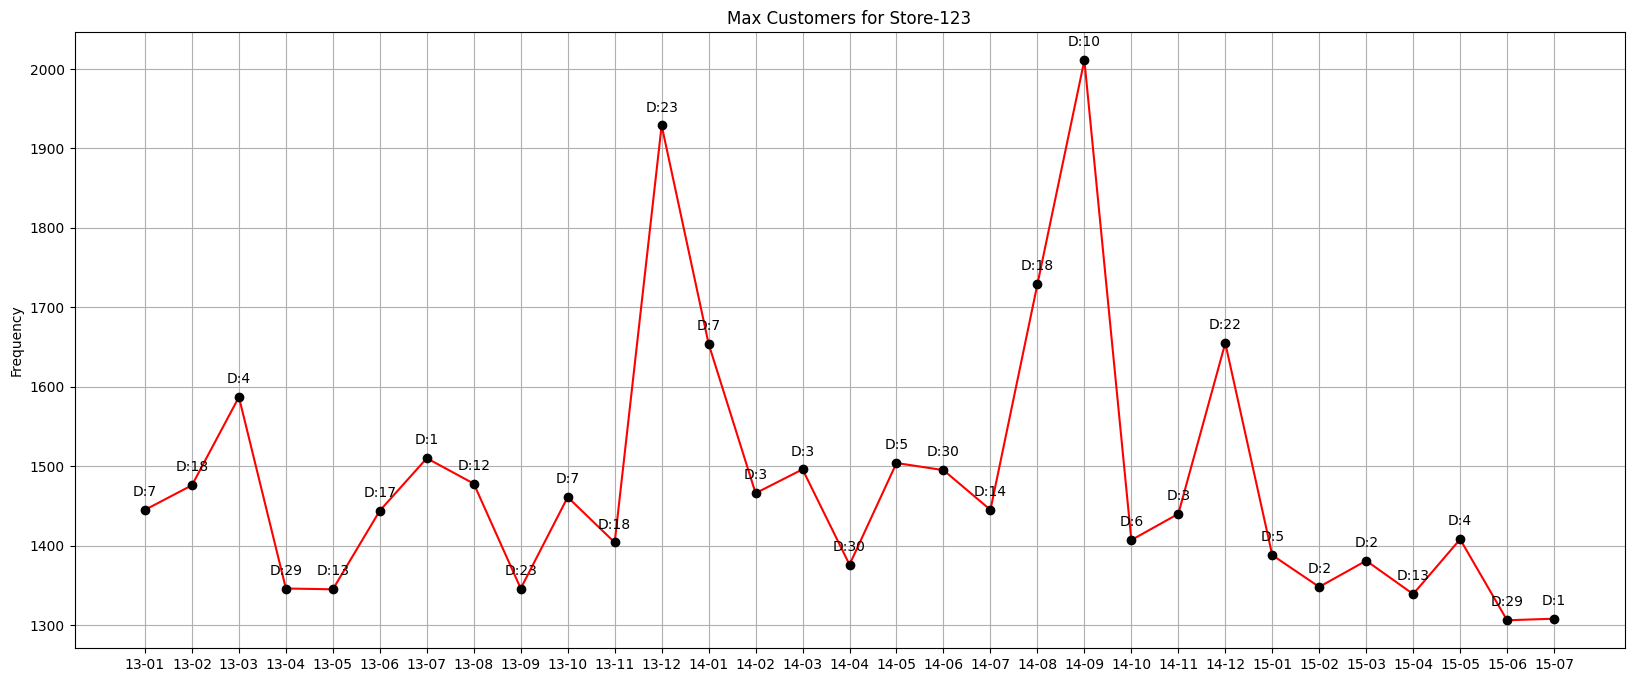

In [416]:
store_id = 123
maxCustomers(store_id)

In [326]:
def maxSales(store_id):

    collection = db.get_collection(f"Store-{store_id}")
    
    if not store_exists(collection):
        return None

    cursor = collection.aggregate([
    { "$unwind" :'$logs'},
    { "$sort": { "logs.Sales": -1 } },
    { "$group": {
        "_id": "$_id",
        "Year": {"$first": "$year"},
        "Month": {"$first": "$month"},
        "Day": { "$first": "$logs.Day" },
        "MaxSales": { "$max":"$logs.Sales"}
    }}
])
    
    order = {}
    order2 = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order[f"{i}-{j}"] = -1
            order2[f"{i}-{j}"] = -1
        
    for i in cursor:
        order[f"{i['Year']}-{i['Month']}"] = i['MaxSales']
        order2[f"{i['Year']}-{i['Month']}"] = int(i['Day'])
    
    x = list(order.values())
    y = list(order.keys())
    days = list(order2.values())

    title = f"Max Sales for Store-{store_id}"
    plot_grafico(x,y,title,True,days)
    

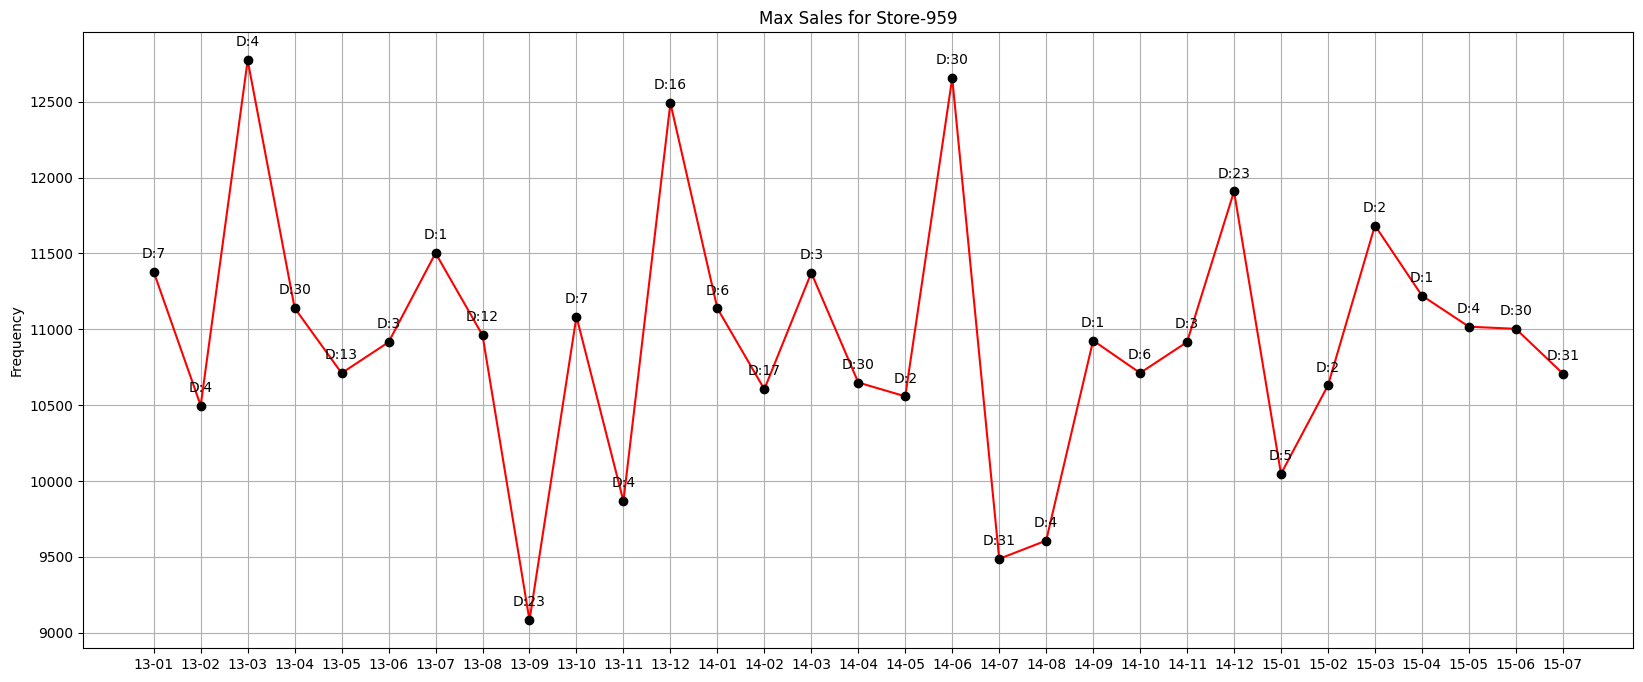

In [329]:
store_id = 959
maxSales(store_id)

In [331]:
def sumCustomers(store_id):
    
    collection = db.get_collection(f"Store-{store_id}")

    if not store_exists(collection):
        return None

    cursor = collection.aggregate([
    { "$unwind" :'$logs'},
    { "$group": {
        "_id": "$_id",
        "Total": { "$sum":"$logs.Customers"},
    }}
    ])


    order = {}
    order2 = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order[f"{i}-{j}"] = -1
        
    for i in cursor:
        year = get_document({'_id':i['_id']},collection)['year']
        month = get_document({'_id':i['_id']},collection)['month']
        order[f"{year}-{month}"] = i['Total']
    
    x = list(order.values())
    y = list(order.keys())

    title = f"Total Customers for Store-{store_id}"
    plot_grafico(x,y,title)


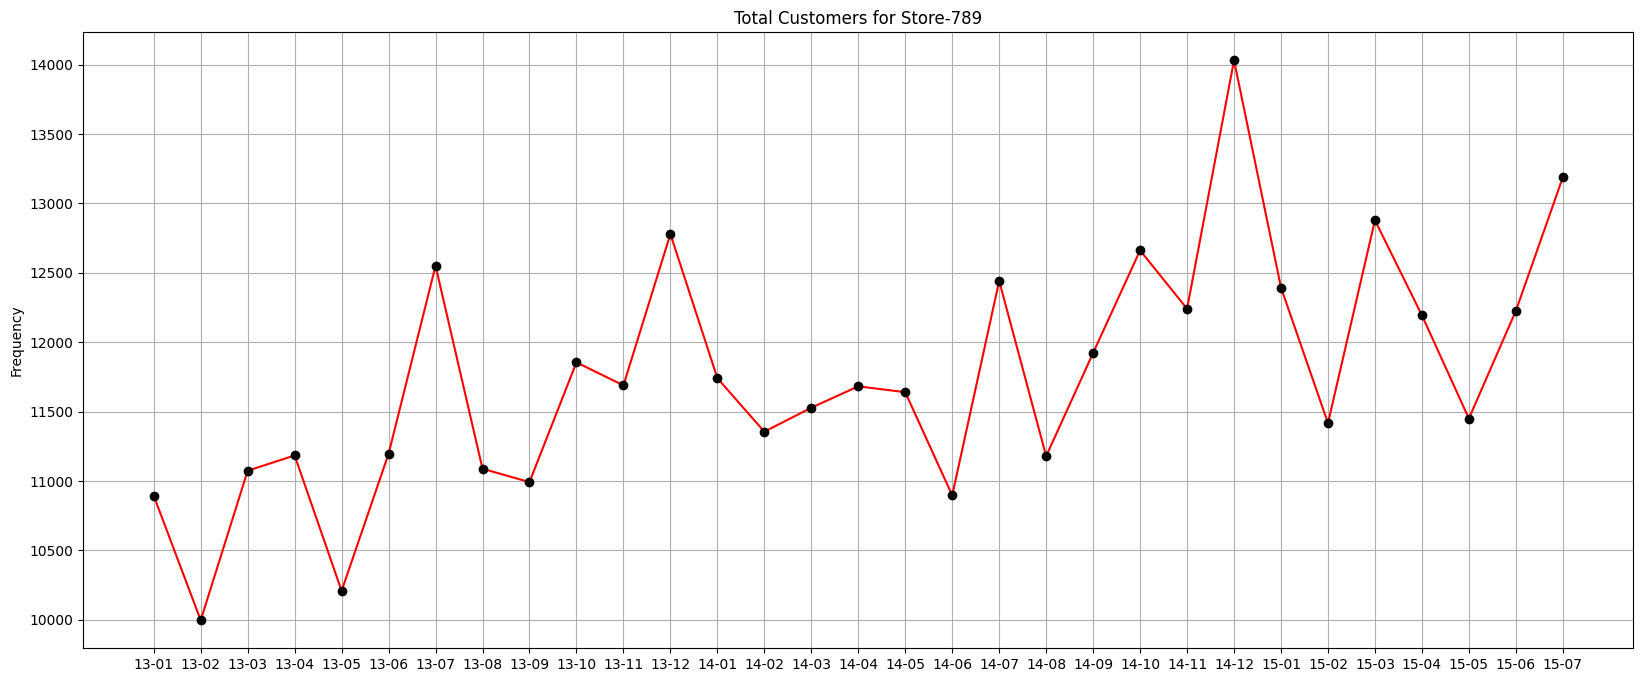

In [332]:
store_id = 789
sumCustomers(store_id)

In [333]:
def sumSales(store_id):
    
    collection = db.get_collection(f"Store-{store_id}")

    if not store_exists(collection):
        return None

    cursor = collection.aggregate([
    { "$unwind" :'$logs'},
    { "$group": {
        "_id": "$_id",
        "Total": { "$sum":"$logs.Sales"},
    }}
    ])

    order = {}
    order2 = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order[f"{i}-{j}"] = -1
        
    for i in cursor:
        year = get_document({'_id':i['_id']},collection)['year']
        month = get_document({'_id':i['_id']},collection)['month']
        order[f"{year}-{month}"] = i['Total']
    
    x = list(order.values())
    y = list(order.keys())

    title = f"Total Customers for Store-{store_id}"
    plot_grafico(x,y,title)



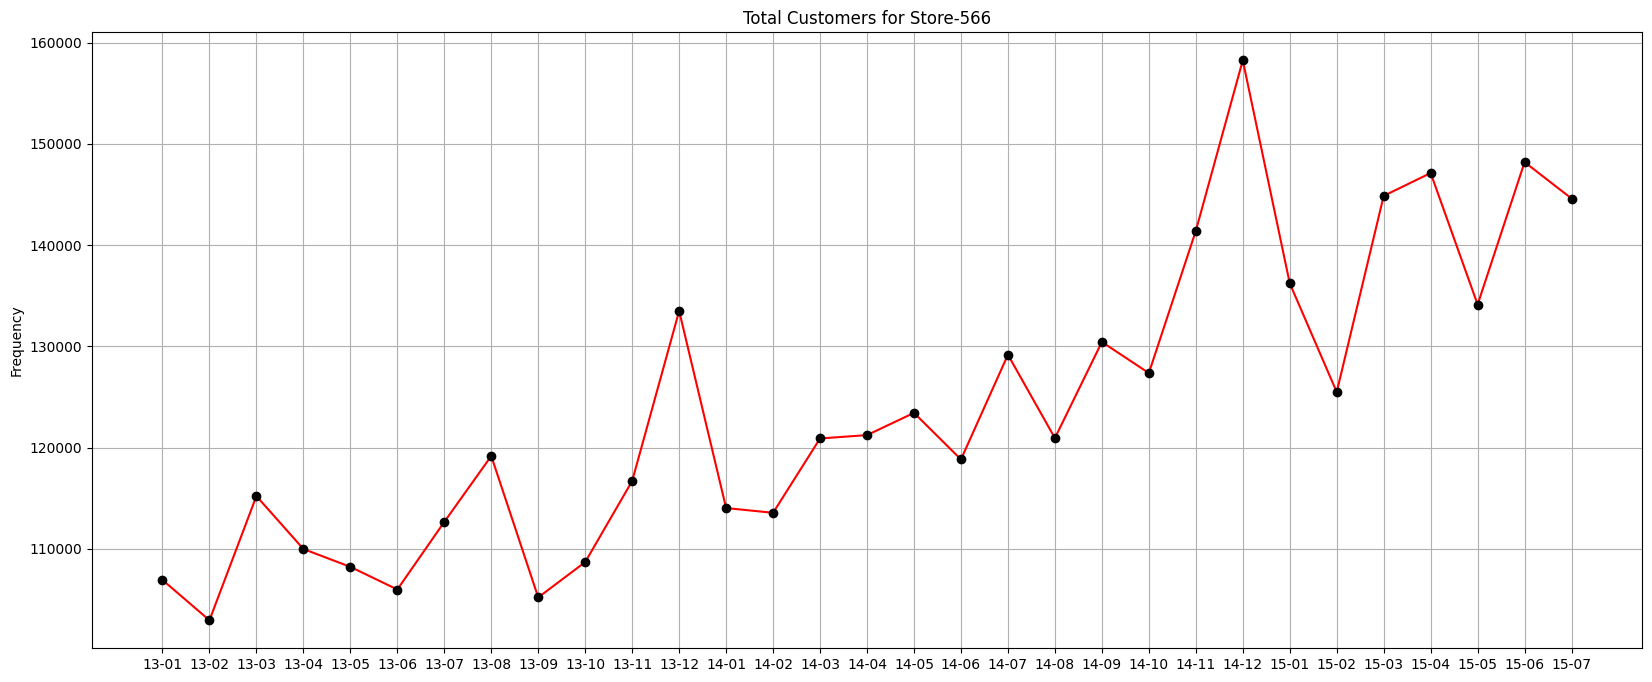

In [334]:
store_id = 566
sumSales(store_id)

In [335]:
def meanCustomers(store_id):


    
    collection = db.get_collection(f"Store-{store_id}")
    
    if not store_exists(collection):
        return None
    
    cursor = collection.aggregate([
    { "$unwind" :'$logs'},
    { "$group": {
        "_id": "$_id",
        "mean_cust": { "$avg":"$logs.Customers"},
    }}
    ])

    order = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order[f"{i}-{j}"] = -1
        
    for i in cursor:
        year = get_document({'_id':i['_id']},collection)['year']
        month = get_document({'_id':i['_id']},collection)['month']
        order[f"{year}-{month}"] = i['mean_cust']
    
    x = list(order.values())
    y = list(order.keys())

    title = f"Mean Customers for Store-{store_id}"
    plot_grafico(x,y,title)
    

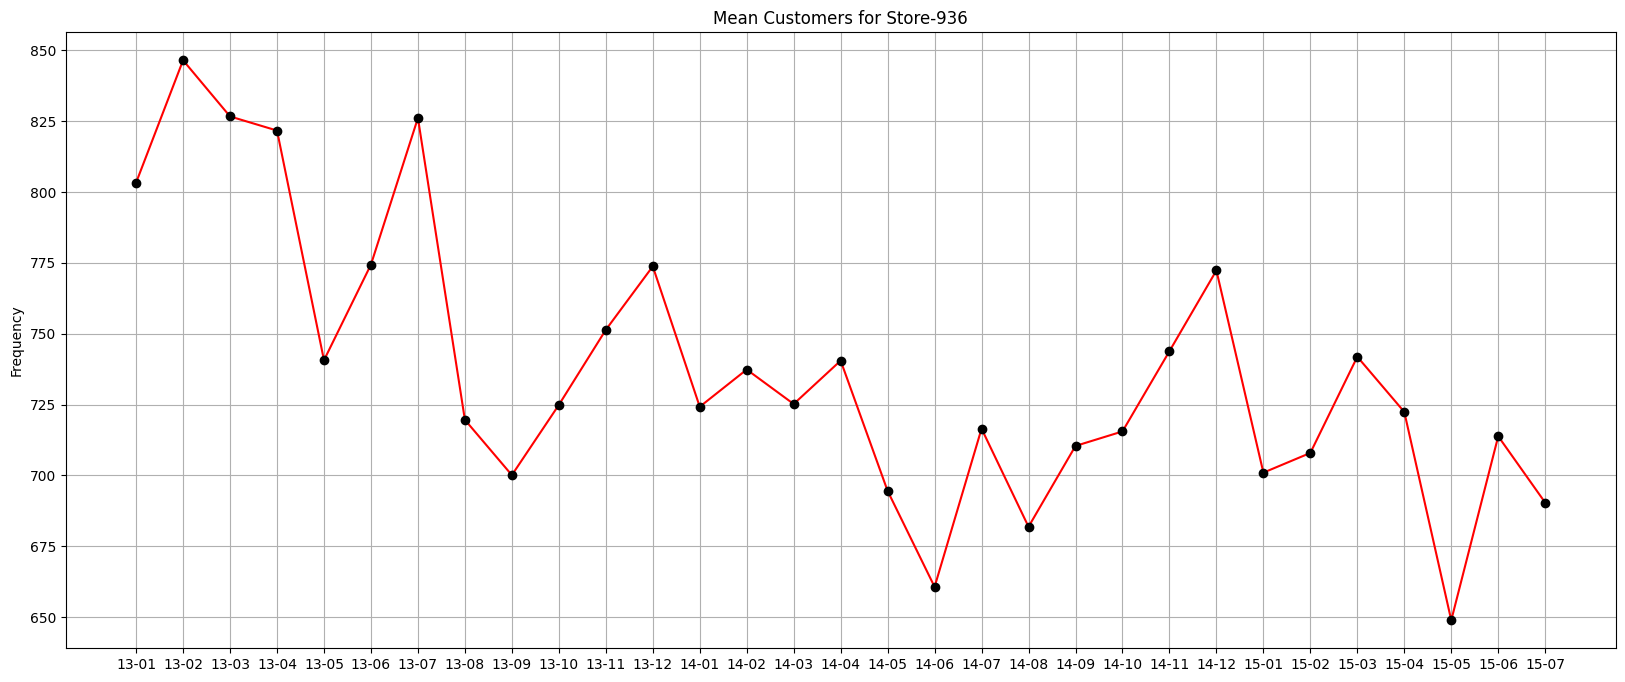

In [336]:
store_id = 936
meanCustomers(store_id)

In [337]:
def meanSales(store_id):
    

    collection = db.get_collection(f"Store-{store_id}")
    
    if not store_exists(collection):
        return None
    
    cursor = collection.find({})
    
    order = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order[f"{i}-{j}"] = -1
        
    for i in cursor:
        order[f"{i['year']}-{i['month']}"] = i['mean_month']
    
    x = list(order.values())
    y = list(order.keys())

    title = f"Mean Sales for Store-{store_id}"
    plot_grafico(x,y,title)



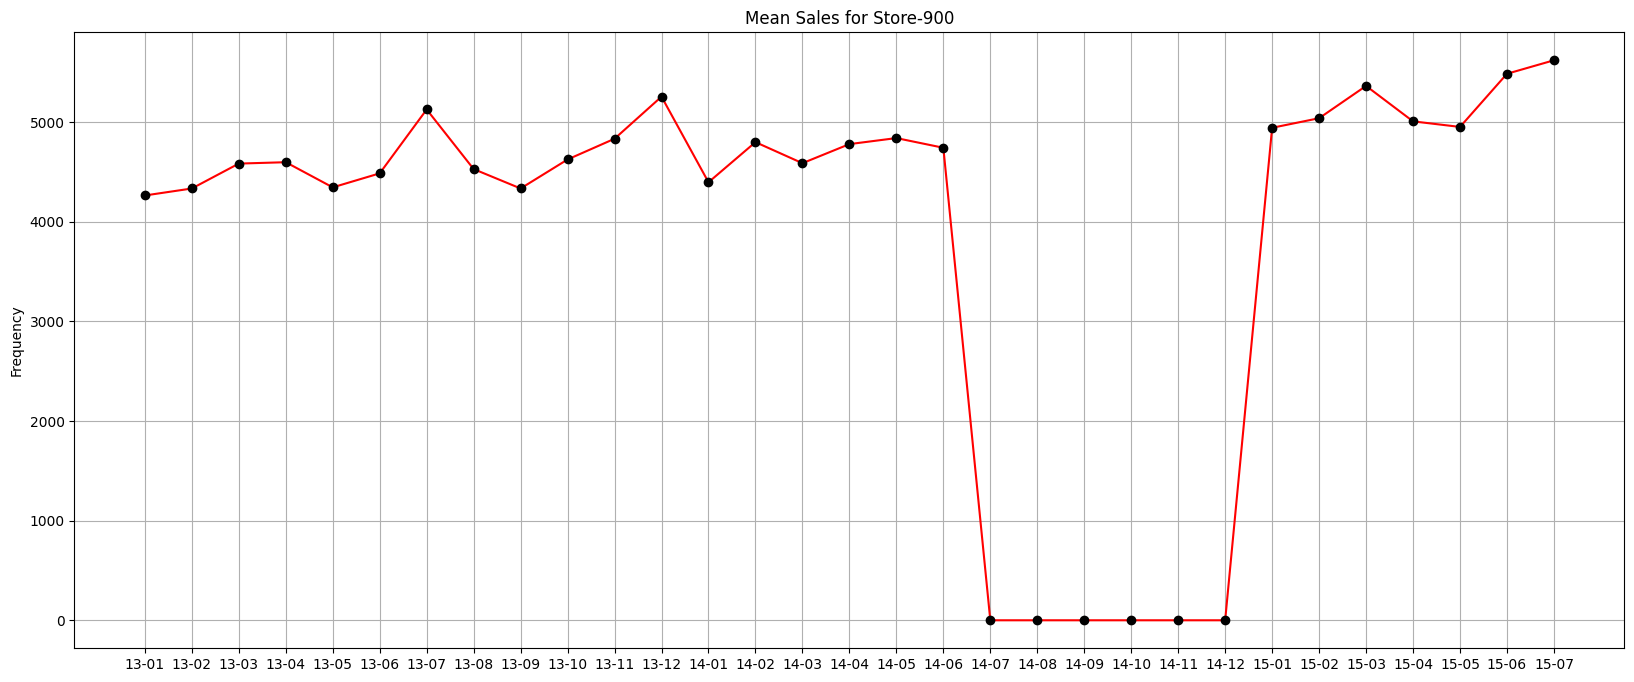

In [384]:
store_id = 900
meanSales(store_id)

In [435]:
def plot_grafico_comparacao(x1,y1,x2,title,store_id,store_type):


    plt.rcParams["figure.figsize"] = (20,8)
    

    bars = y1

    for i in range(len(bars)):

        bars[i] = bars[i][2:]
        
    y_pos = np.arange(len(bars))

    

    plt.plot(y_pos,x1,color = 'r',label=f'Store-{store_id}',marker='o',markeredgecolor='black',markerfacecolor='black')

    plt.plot(y_pos,x2,color = 'b',label=f'{store_type} store_type',marker='o',markeredgecolor='black',markerfacecolor='black')
   
        # Cria os nomes para o eixo X, o título, o label para o eixo Y e a legenda dos gráficos
    plt.xticks(y_pos, bars)
    plt.title(f"{title}")
    plt.ylabel("Frequency")

    plt.grid()
    plt.legend()

 
    
    plt.show()
    



In [436]:
def compareMean(store_id):

    collection = db.get_collection(f"Stores")

    q = {"stores": {"$elemMatch": {"Store":store_id}}}

    cursor = collection.find(q)
    stores_id = cursor[0]['stores']
    store_type = cursor[0]['store_type']

    N = len(stores_id) - 1
    
    order_1 = {}
    order_2 = {}
    
    for i in [2013,2014,2015]:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            if i == 2015 and int(j) > 7:
                break
            
            order_1[f"{i}-{j}"] = -1
            order_2[f"{i}-{j}"] = -1
        
    for i in order_2:
            collection_store = None
            sum_mean = 0

            year = i[:4]
            month = i[5:7]
            for j in stores_id:
                id = j['Store']
                temp_col = db.get_collection(f"Store-{id}")
                if id != store_id:

                    sum_mean += temp_col.find({'month':month,'year':year})[0]['mean_month']
                    del temp_col
                else:
                    order_1[i] = temp_col.find({'month':month,'year':year})[0]['mean_month']
                    

            order_2[i] = sum_mean / N
                

                
        
    x = list(order_1.values())
    y = list(order_1.keys())

    title = f"Mean sales {store_type} store type x Mean sales Store-{store_id}"
    

    x2 = list(order_2.values())

    plot_grafico_comparacao(x,y,x2,title,store_id,store_type)


    

    

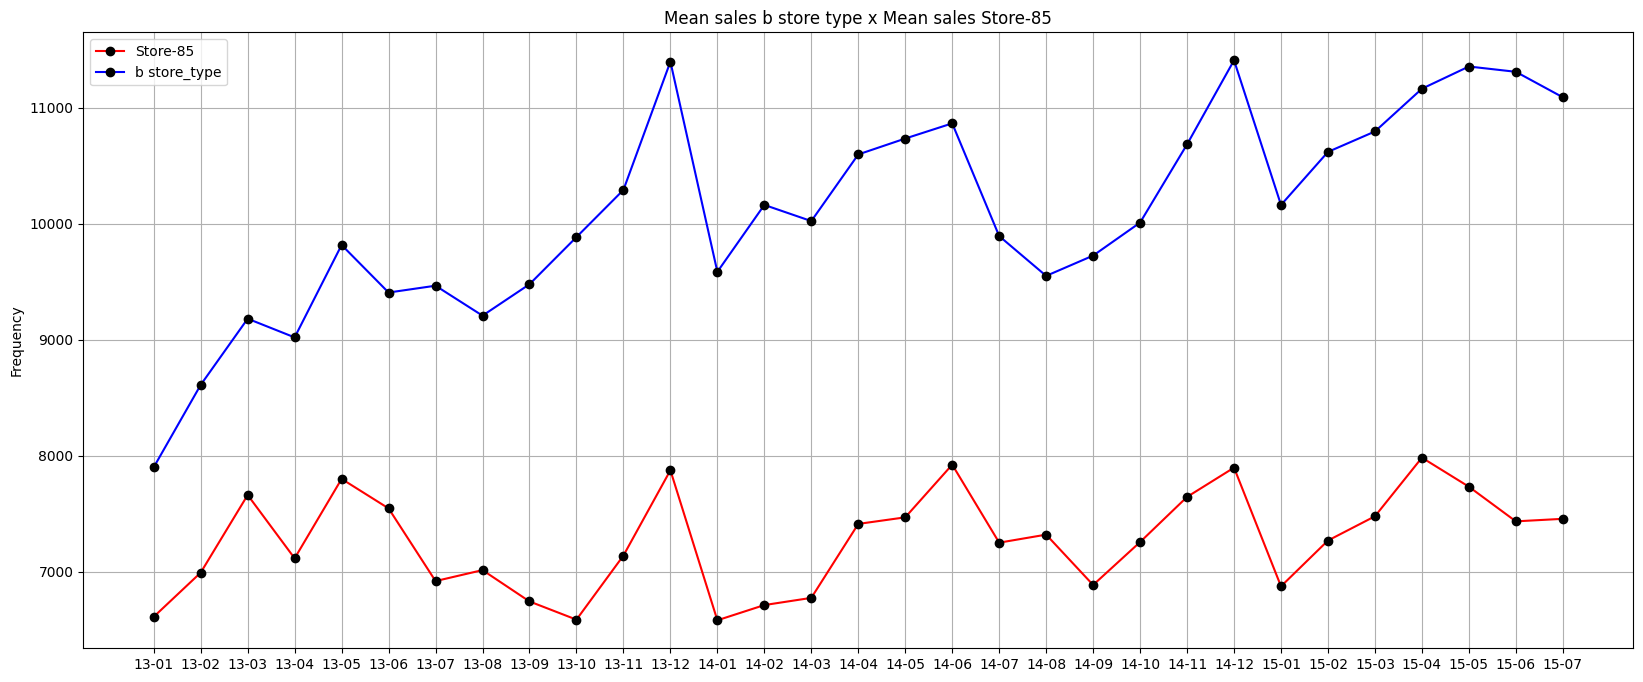

In [437]:
compareMean(85)